#Data Science Clssification Project: Customer Segmentation Multiclass Classification

[Dataset](https://www.kaggle.com/datasets/kaushiksuresh147/customer-segmentation?rvi=1)

**Classify the customers into four segments.**

##Dataset Information:
An automobile company has plans to enter new markets with their existing products (P1, P2, P3, P4, and P5). After intensive market research, they’ve deduced that the behavior of the new market is similar to their existing market.
In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D ). Then, they performed segmented outreach and communication for a different segment of customers. This strategy has work e exceptionally well for them. They plan to use the same strategy for the new markets and have identified 2627 new potential customers

**Train Dataset contains 11 attributes:**
1. ID : Unique ID
2. Gender : Gender of the customer
3. Ever_Married : Marital status of the customer
4. Age : Age of the customer
5. Graduated : Is the customer a graduate?
6. Profession : Profession of the customer
7. Work_Experience : Work Experience in years
8. Spending_Score : Spending score of the customer
9. Family_Size : Number of family members for the customer (including the customer)
10. Var_1 : Anonymised Category for the customer
11. Segmentation : (target) Segment of the customer



##Importing the Libraries

In [313]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

##Load the dataset

In [314]:
df_train = pd.read_csv('/content/Train.csv')
df_test = pd.read_csv('/content/Test.csv')
df_train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [315]:
df_train.shape

(8068, 11)

##Data Cleaning

In [316]:
df_train.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [317]:
df_train['Ever_Married'].value_counts()

Yes    4643
No     3285
Name: Ever_Married, dtype: int64

In [318]:
##Fill null values with the ffill method will replace it with the last non-null value in that column or row.
df_train['Ever_Married'].fillna(method='ffill',inplace=True)

In [319]:
df_train['Graduated'].value_counts()

Yes    4968
No     3022
Name: Graduated, dtype: int64

In [320]:
df_train['Graduated'].fillna(method='ffill',inplace=True)

In [321]:
df_train['Profession'].value_counts()

Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: Profession, dtype: int64

In [322]:
#Replace null values in the "Profession" column with "Other"
df_train['Profession'].fillna('Other', inplace=True)

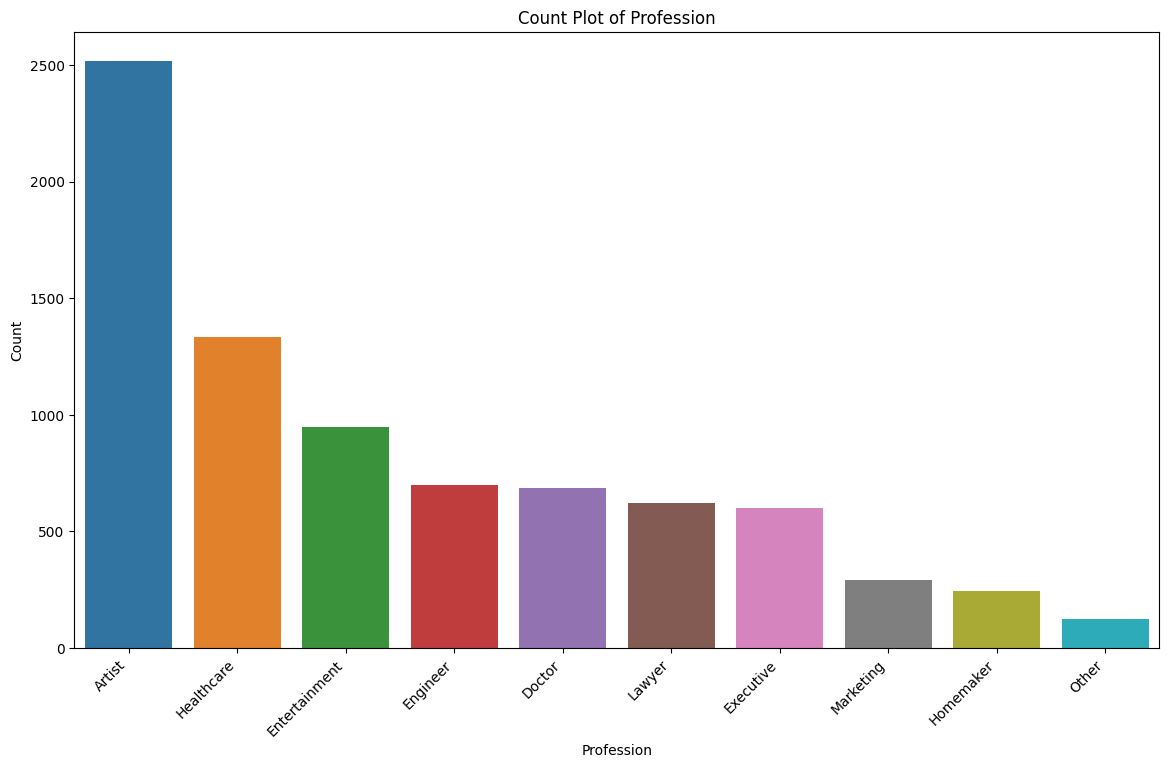

In [323]:
# Create a count plot for 'Additional_Info'
plt.figure(figsize=(14, 8))
sns.countplot(x='Profession', data=df_train, order=df_train['Profession'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Profession')
plt.ylabel('Count')
plt.title('Count Plot of Profession')
plt.show()

In [324]:
df_train['Work_Experience'].value_counts()

1.0     2354
0.0     2318
9.0      474
8.0      463
2.0      286
3.0      255
4.0      253
6.0      204
7.0      196
5.0      194
10.0      53
11.0      50
12.0      48
13.0      46
14.0      45
Name: Work_Experience, dtype: int64

In [325]:
#Replace null values in the "Work_Experience" column with "0.0"
df_train['Work_Experience'].fillna(0.0 , inplace=True)

In [326]:
df_train['Family_Size'].value_counts()

2.0    2390
3.0    1497
1.0    1453
4.0    1379
5.0     612
6.0     212
7.0      96
8.0      50
9.0      44
Name: Family_Size, dtype: int64

In [327]:
#Replace with ffill method
df_train['Family_Size'].fillna(method='ffill',inplace=True)
df_train['Var_1'].fillna(method='ffill',inplace=True)

In [328]:
df_train.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

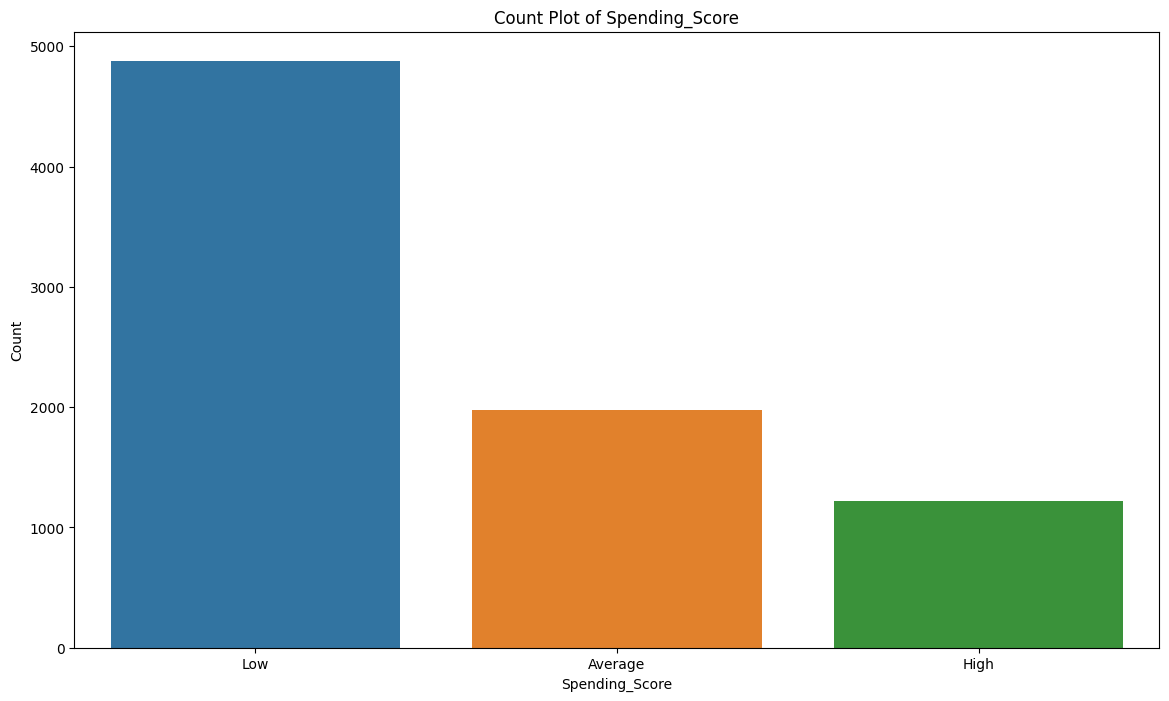

In [329]:
# Create a count plot for 'Additional_Info'
plt.figure(figsize=(14, 8))
sns.countplot(x='Spending_Score', data=df_train, order=df_train['Spending_Score'].value_counts().index)
plt.xlabel('Spending_Score')
plt.ylabel('Count')
plt.title('Count Plot of Spending_Score')
plt.show()

In [330]:
df_train.duplicated().sum()

0

In [331]:
df_train.shape

(8068, 11)

In [332]:
df_train.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,8068.000000,8068.000000
mean,463479.214551,43.466906,2.370228,2.846678
std,2595.381232,16.711696,3.325175,1.530377
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [333]:
df_train.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

##Label Encoding

In [334]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_train['Gender'] = le.fit_transform(df_train['Gender'])
df_train['Ever_Married'] = le.fit_transform(df_train['Ever_Married'])
df_train['Graduated'] = le.fit_transform(df_train['Graduated'])
df_train['Profession'] = le.fit_transform(df_train['Profession'])
df_train['Spending_Score'] = le.fit_transform(df_train['Spending_Score'])
df_train['Var_1'] = le.fit_transform(df_train['Var_1'])

In [335]:
df_train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,0,22,0,5,1.0,2,4.0,3,D
1,462643,0,1,38,1,2,0.0,0,3.0,3,A
2,466315,0,1,67,1,2,1.0,2,1.0,5,B
3,461735,1,1,67,1,7,0.0,1,2.0,5,B
4,462669,0,1,40,1,3,0.0,1,6.0,5,A


##EDA

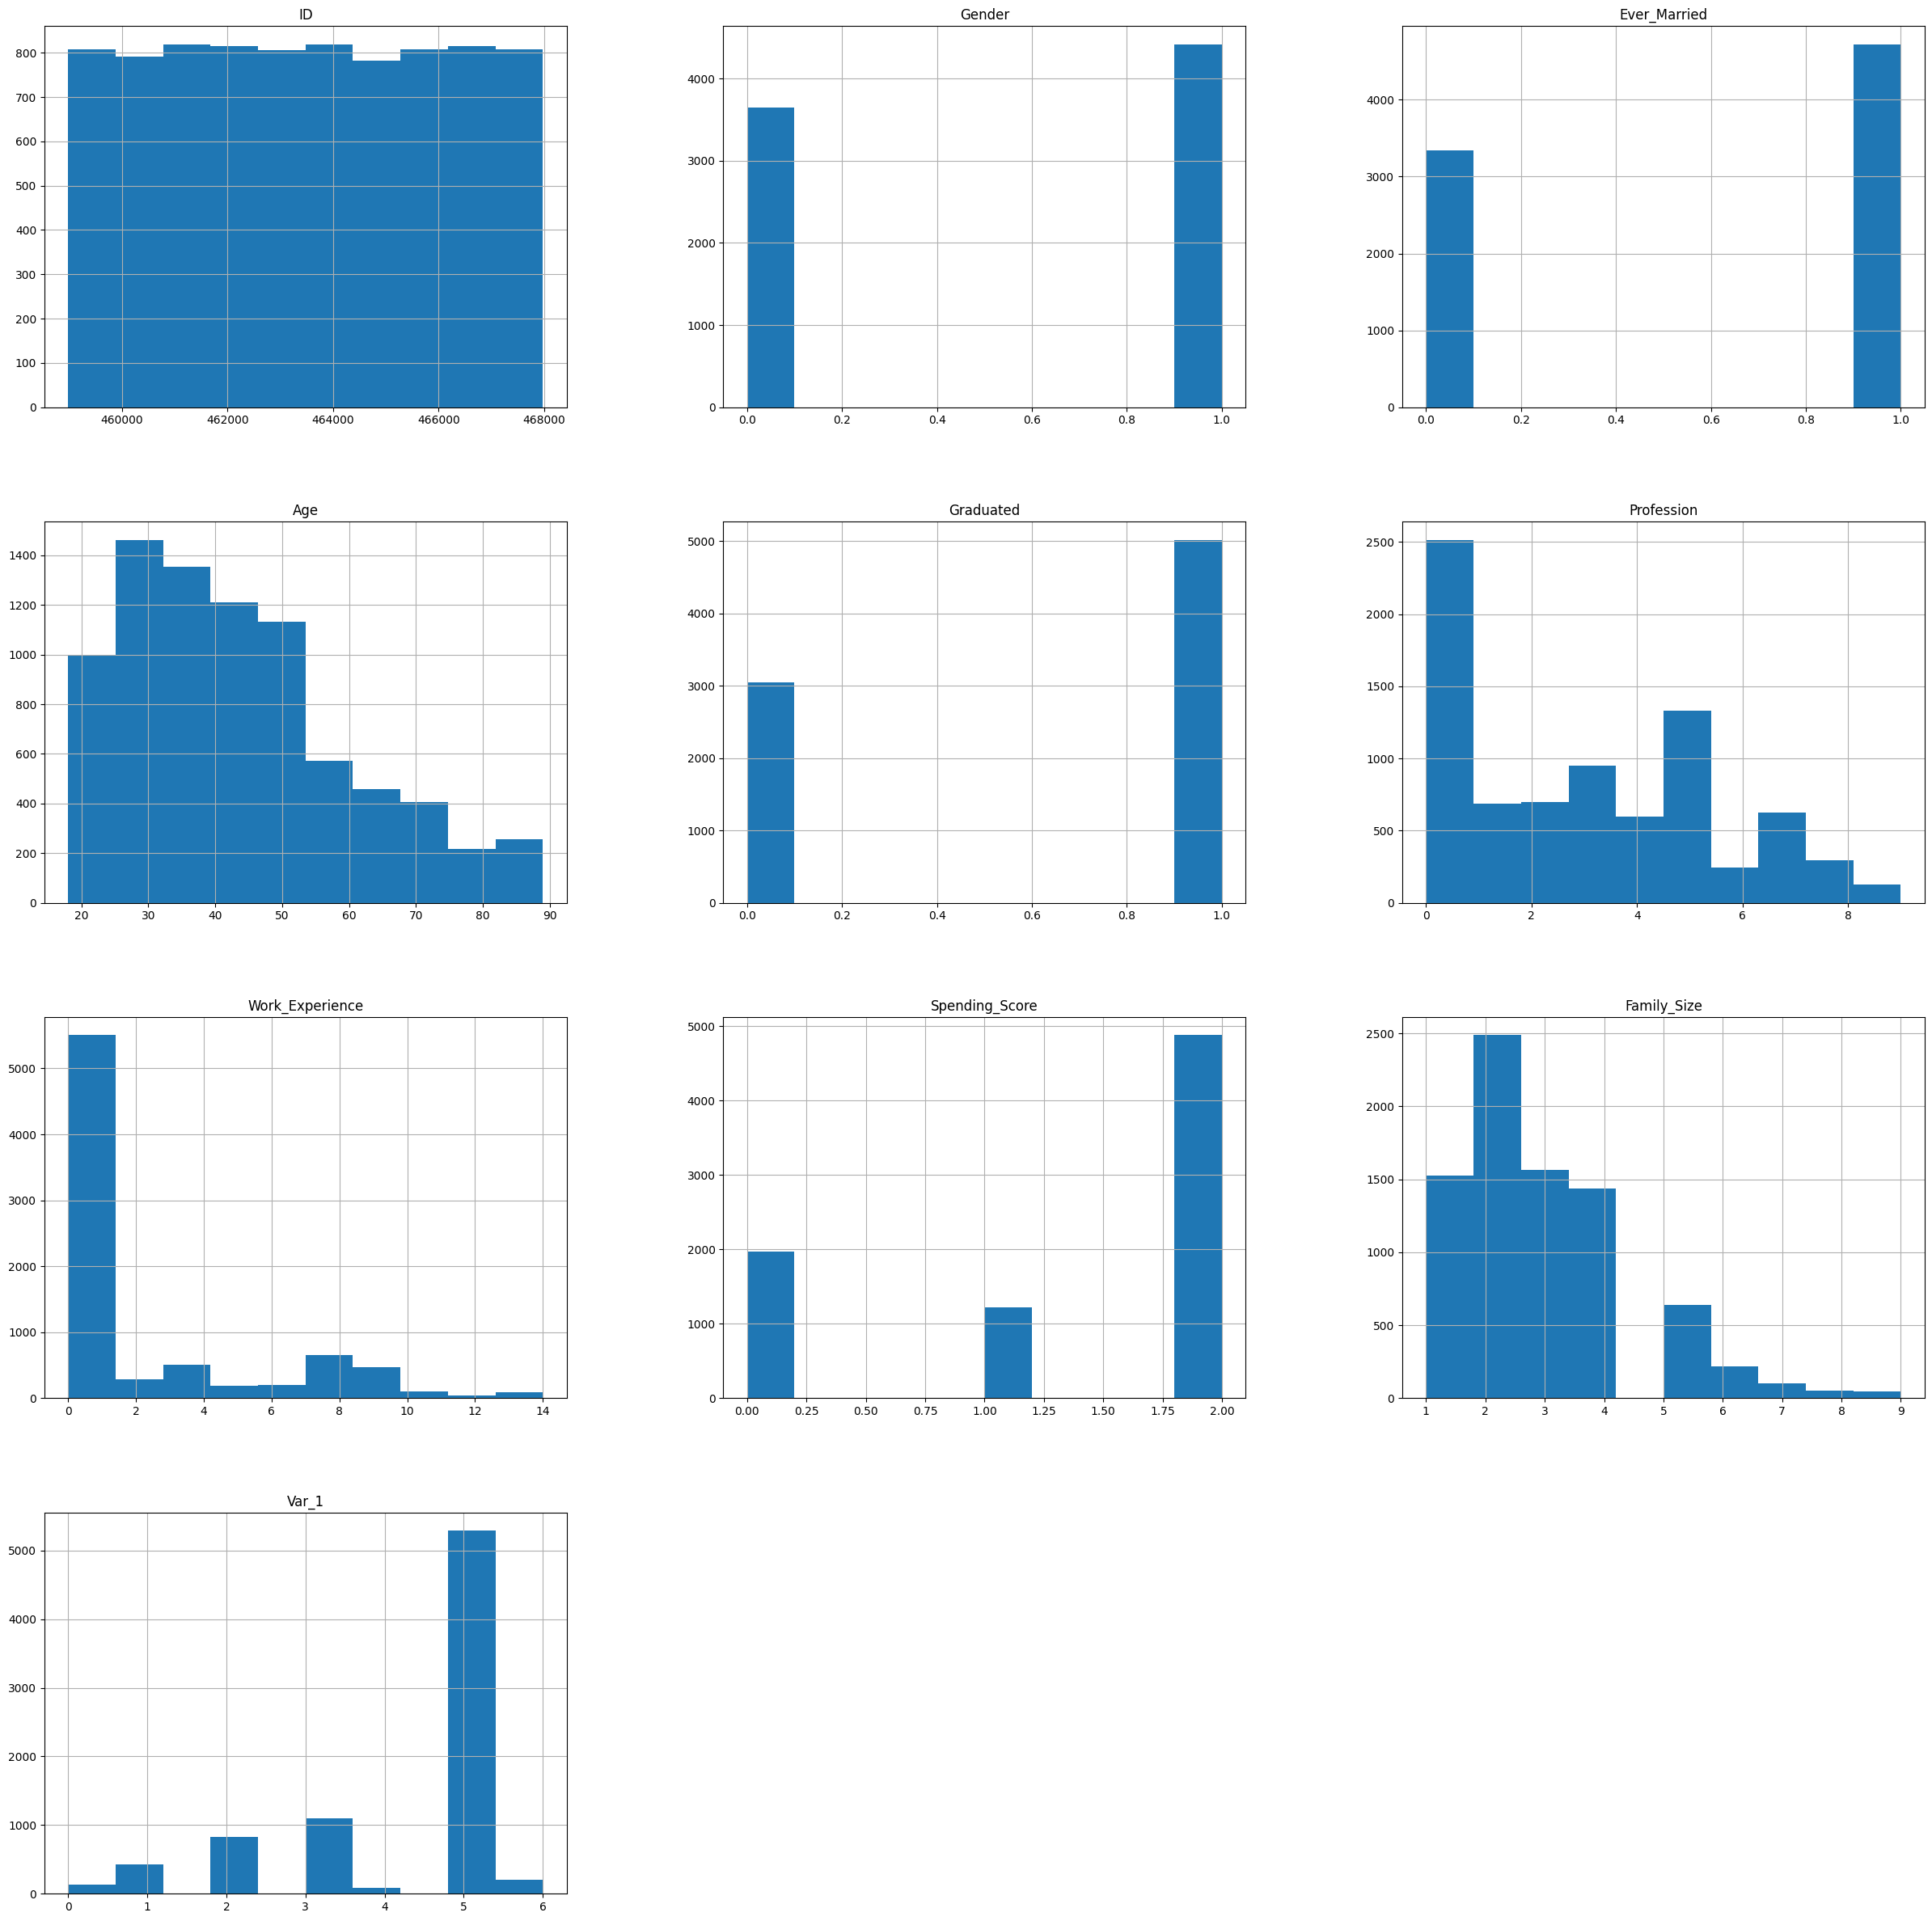

In [336]:
df_train.hist(figsize=(30,30))
plt.show()

In [337]:
df_train.drop('ID',inplace=True,axis=1)

In [338]:
df_train.describe()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
count,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000
mean,0.547471,0.585275,43.466906,0.622335,2.885226,2.370228,1.359941,2.846678,4.138572
std,0.497772,0.492705,16.711696,0.484833,2.631486,3.325175,0.848418,1.530377,1.425436
min,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000
50%,1.000000,1.000000,40.000000,1.000000,3.000000,1.000000,2.000000,3.000000,5.000000
75%,1.000000,1.000000,53.000000,1.000000,5.000000,4.000000,2.000000,4.000000,5.000000
max,1.000000,1.000000,89.000000,1.000000,9.000000,14.000000,2.000000,9.000000,6.000000


##Feature Selection

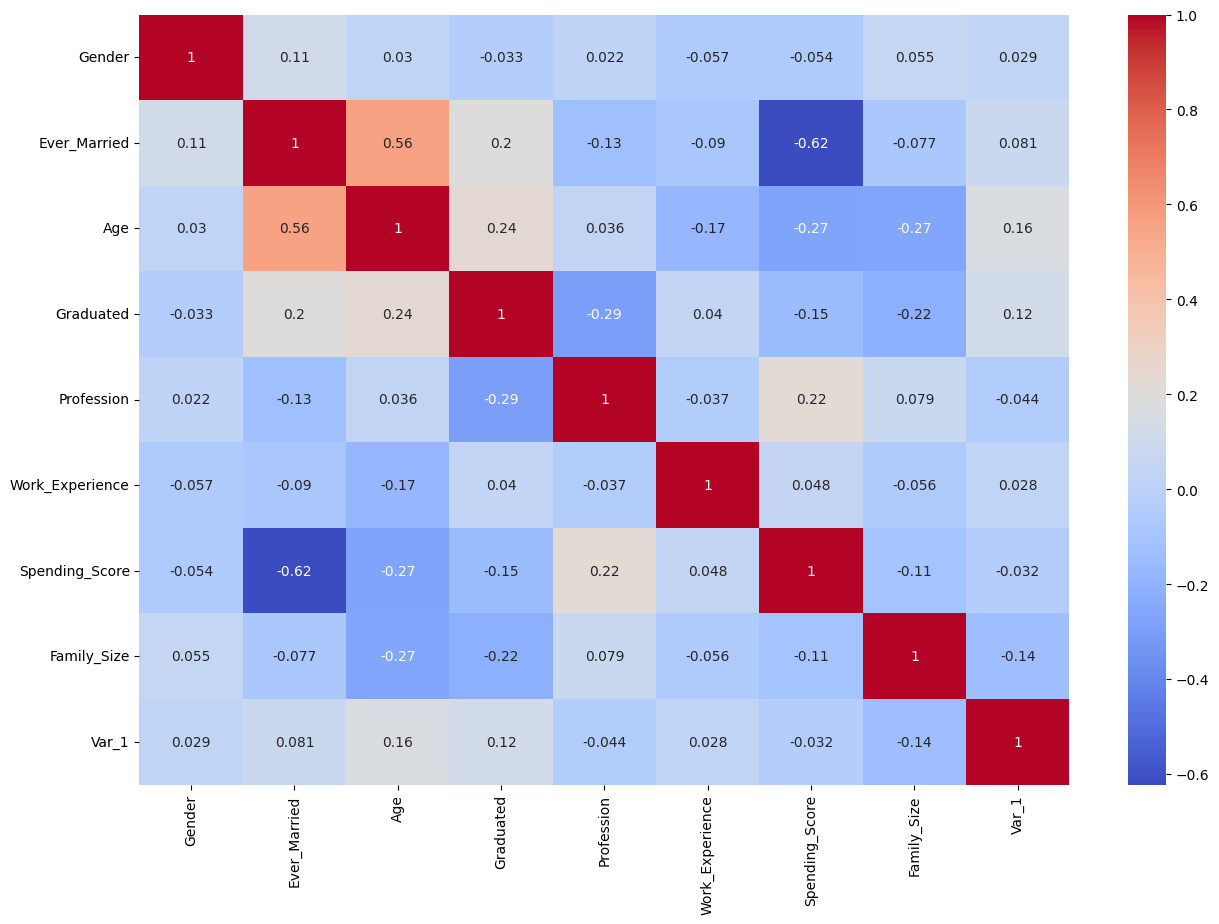

In [339]:
plt.figure(figsize=(15,10))
sns.heatmap(df_train.corr(),cmap='coolwarm',annot=True)
plt.show()

In [340]:
X=df_train.drop(columns=['Segmentation'])
y=df_train[['Segmentation']]

##Spltting the dataset into Training set and Testings set

In [341]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

##Standardizing the dataset

In [342]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

##1. Logistic Regression to predict the segments

In [343]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [344]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,classification_report,confusion_matrix

In [345]:
print(confusion_matrix(y_test,y_pred))

[[163  30  91 107]
 [108  44 166  51]
 [ 67  41 221  51]
 [ 81  14  35 344]]


In [346]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           A       0.39      0.42      0.40       391
           B       0.34      0.12      0.18       369
           C       0.43      0.58      0.49       380
           D       0.62      0.73      0.67       474

    accuracy                           0.48      1614
   macro avg       0.45      0.46      0.44      1614
weighted avg       0.46      0.48      0.45      1614



##2. DecisionTree classifier to predict the segments

In [347]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred=dtc.predict(x_test)

In [348]:
print(confusion_matrix(y_test,y_pred))

[[117 106  75  93]
 [100 122 106  41]
 [ 74  96 171  39]
 [ 86  65  48 275]]


In [349]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           A       0.31      0.30      0.30       391
           B       0.31      0.33      0.32       369
           C       0.43      0.45      0.44       380
           D       0.61      0.58      0.60       474

    accuracy                           0.42      1614
   macro avg       0.42      0.42      0.42      1614
weighted avg       0.43      0.42      0.43      1614



##3. RandomForest classifier to predict the segments

In [350]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)

In [351]:
print(confusion_matrix(y_test,y_pred))

[[154  93  59  85]
 [ 90 138  95  46]
 [ 57  84 190  49]
 [ 90  37  29 318]]


In [352]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           A       0.39      0.39      0.39       391
           B       0.39      0.37      0.38       369
           C       0.51      0.50      0.50       380
           D       0.64      0.67      0.65       474

    accuracy                           0.50      1614
   macro avg       0.48      0.48      0.48      1614
weighted avg       0.49      0.50      0.49      1614



##4. Support Vector Machine classifier to predict the segments

In [353]:
#Support Vector Machine
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)

In [354]:
print(confusion_matrix(y_test,y_pred))

[[182  61  60  88]
 [ 89 114 126  40]
 [ 58  66 209  47]
 [107  18  13 336]]


In [355]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           A       0.42      0.47      0.44       391
           B       0.44      0.31      0.36       369
           C       0.51      0.55      0.53       380
           D       0.66      0.71      0.68       474

    accuracy                           0.52      1614
   macro avg       0.51      0.51      0.50      1614
weighted avg       0.52      0.52      0.51      1614



##5. KNearest Neighbors classifier to predict the segments

In [356]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knc= KNeighborsClassifier()
knc.fit(x_train,y_train)
y_pred=knc.predict(x_test)

In [357]:
print(confusion_matrix(y_test,y_pred))

[[174  89  54  74]
 [108 137  91  33]
 [ 72  92 179  37]
 [118  48  33 275]]


In [358]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           A       0.37      0.45      0.40       391
           B       0.37      0.37      0.37       369
           C       0.50      0.47      0.49       380
           D       0.66      0.58      0.62       474

    accuracy                           0.47      1614
   macro avg       0.48      0.47      0.47      1614
weighted avg       0.49      0.47      0.48      1614



##Predicting the segments of test set

In [359]:
df_test.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A


In [360]:
df_test.isnull().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
Segmentation         0
dtype: int64

In [361]:
##Fill null values
df_test['Ever_Married'].fillna(method='ffill',inplace=True)
df_test['Graduated'].fillna(method='ffill',inplace=True)
df_test['Profession'].fillna('Other', inplace=True)
df_test['Work_Experience'].fillna(0.0 , inplace=True)
df_test['Family_Size'].fillna(method='ffill', inplace=True)
df_test['Var_1'].fillna(method='ffill', inplace=True)

In [362]:
df_test.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [363]:
df_test.duplicated().sum()

0

In [364]:
#Label Encoding
df_test['Gender'] = le.fit_transform(df_test['Gender'])
df_test['Ever_Married'] = le.fit_transform(df_test['Ever_Married'])
df_test['Graduated'] = le.fit_transform(df_test['Graduated'])
df_test['Profession'] = le.fit_transform(df_test['Profession'])
df_test['Spending_Score'] = le.fit_transform(df_test['Spending_Score'])
df_test['Var_1'] = le.fit_transform(df_test['Var_1'])

In [365]:
df_test.drop('ID',inplace=True,axis=1)

In [366]:
X=df_test.drop(columns=['Segmentation'])
y=df_test[['Segmentation']]

In [367]:
X = sc.fit_transform(X)

In [368]:
predictions = svc.predict(X)
predictions

array(['A', 'B', 'A', ..., 'A', 'B', 'D'], dtype=object)

In [369]:
print(confusion_matrix(y, predictions))

[[254 132 189 271]
 [148 112 154 136]
 [131 100 162  79]
 [183  96 138 342]]


In [370]:
print(classification_report(y, predictions))

              precision    recall  f1-score   support

           A       0.35      0.30      0.33       846
           B       0.25      0.20      0.23       550
           C       0.25      0.34      0.29       472
           D       0.41      0.45      0.43       759

    accuracy                           0.33      2627
   macro avg       0.32      0.32      0.32      2627
weighted avg       0.33      0.33      0.33      2627



##Conclusion :
Analyse the dataset, convert it into numeric values using labelecoding, split int train set contain 80% and test set contain 20% data, standardize the features, apply 5 machine learning classification models: Logistic Regression, DecisionTree Classifier, RandomForest Classifier, KNearest Neighbor Classifier and Support Vector Machine Classifier with the five models SVM contains the best accuracy.

The results didn't do well,with an accuracy of 33%.